# FINAL PROJECT : CREDIT RISK DETECTION


---

Oleh **Andika Zidane Faturrahman** 

Pada notebook ini, akan dijelaskan langkah-langkah pengerjaan proyek credit risk detection


# Libraries yang digunakan

In [162]:
# Import Data
import pandas as pd

# Import 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')


from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.feature_selection import RFECV, RFE, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Business Understanding

Sebagai tugas akhir dari masa kontrak saya sebagai intern Data Scientist di ID/X Partners, kali ini saya akan dilibatkan dalam projek dari sebuah lending company.Saya akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Saya diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. 

Sebelum maju ke bagian analitik, akan dijelaskan terlebih dahulu apa itu credit risk modeling. Credit risk modeling adalah pemodelan yang dilakukan untuk menentukan risiko memberikan pinjaman kepada peminjam berdasarkan informasi/track record peminjam tersebut. Ada dua tipe risiko yang dihadapi oleh perusahaan pinjaman, yakni :    

* Peminjam dapat mengembalikan pinjamannya sesuai dengan tenggat waktu yang diberikan. Apabila pinjamannya tidak disetujui, maka perusahaan tersebut akan rugi sebesar bunga dan biaya jasa yang ditetapkan kepada peminjam tersebut. 
* Peminjam tidak dapat mengembalikan pinjamannya sesuai dengan tenggat waktu yang diberikan (Secara umum disebut *default*). Apabila pinjamannya disetujui, maka perusahaan akan rugi sebesar pinjaman, bunga dan biaya jasa yang ditetapkan kepada peminjam tersebut.

Harapannya, dengan bantuan model machine learning, kesalahan untuk memberikan/menahan pinjaman dapat ditekan secara maksimal. 

# Analytical Approach

Pada bagian ini, akan dijelaskan apa yang akan saya lakukan untuk menyelesaikan permasalahan yang telah didefinisikan di bagian *business understanding*. Ada 3 sub bagian yang akan dijelaskan yakni :    
* Perumusan solusi 
* Menilai kelayakan solusi-solusi
* Menentukan milestones/target-target kecil


## Perumusan Solusi

Permasalahannya adalah prediksi apakah peminjam dapat mengembalikan pinjamannya atau tidak, maka dari itu model machine learning yang akan digunakan adalah model supervised learning untuk kasus klasifikasi. Akan diuji beberapa model klasifikasi sebagai berikut :    

* Logistic Regression
* Support Vector Machine (SVM) Classifier
* Linear Discriminant Analysis (LDA) Classifier
* Decision Tree Classifier
* Random Forest Classifier

Sebelum menggunakan model tersebut, perlu diperhatikan data yang akan digunakan untuk pemodelan ini, ada 4 jenis pendekatan analitik yang akan dilakukan yakni,

1. Analisis Deskriptif : Melihat summary statistics dari data tersebut berupa persebaran nilai target (loan_status), persebaran missing values yang ada di data tersebut, dll. 
2. Analisis Diagnostik : Melihat hubungan sebab akibat dari informasi peminjam terhadap apakah peminjam default atau tidak. 

Kedua bagian di atas akan dijelaskan di sub-bagian Exploratory Data Analysis (EDA) pada bagian Data Understanding, 

3. Analisis Prediktif : Memprediksi peminjam default atau tidak dengan menggunakan model machine learning






## Menilai kelayakan solusi-solusi

Untuk menilai model klasifikasi yang terbaik dalam memprediksi default/tidak default, maka akan dilihat skor AUC-ROC.

**Area Under Curve - Receiver Operating Characteristics** (biasa disingkat AOC-ROC) adalah suatu kurva yang menggambarkan performa model dalam memprediksi variabel target. ROC adalah kurva peluangnya dan AUC menyatakan derajat separasi, digunakan untuk melihat seberapa bagus model melakukan klasifikasi variabel target. Semakin tinggi skor AUC, maka semakin baik model memprediksi variabel target tersebut. Berikut adalah kurva AOC-ROC

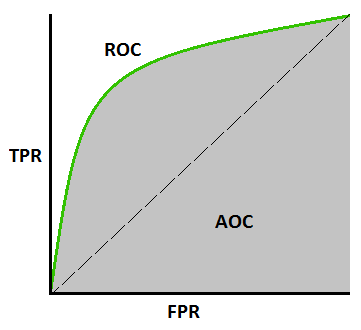

Semakin garis hijaunya mendekati nilai 1 di sumbu TPR, maka semakin baik model tersebut dalam memprediksi variabel target.

Sumber : https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Tetapi, performa model di atas bergantung dengan bagaimana pemrosesan datanya, terutama ada dua jenis model yang digunakan yakni model linear dan model pohon, model linear mensyaratkan harus distandarisasi datanya sementara model pohon tidak perlu menstandarisasi datanya, akan ada dua pipeline pemodelan yang berbeda untuk kedua model. 


## Milestones

Langkah-langkah yang harus dilakukan untuk membuat model klasifikasi bekerja dengan baik adalah sebagai berikut :    

1. Untuk model linear (Logistic Regression, Support Vector Machine) :    
  * Isi missing values (bisa dengan median, mean atau informasi yang tertera di datanya)
  * Ubah fitur kategorikal menjadi numerik dengan One Hot Encoding,
  * Lakukan Standarisasi pada data tersebut
  * Lakukan Feature Selection dengan Statistik F untuk mengurangi fitur-fitur yang redundant

2. Untuk model pohon (Decision Tree Classifier, Random Forest Classifier) : 
  *  Isi missing values (bisa dengan median, mean atau informasi yang tertera di datanya)
  * Ubah fitur kategorikal dengan Label Encoding atau menghilangkan kata tertentu 
  * **NOTE : Tidak perlu digunakan One Hot Encoding karena justru semakin banyak fitur yang digunakan, semakin redundant fitur yang tersedia (Curse of Dimensionality), sementara model Tree akan memilih fitur yang dapat memberikan split data terbaik, makin banyak fitur, makin tidak baik split datanya**
  * Lakukan Feature Selection dengan Statistik F untuk mengurangi fitur-fitur yang redundant

# Data Requirements
Karena perusahaan lending tersebut telah memberikan datanya, maka data yang digunakan cukup dari perusahaan tersebut

# Data Collection

Download data perusahaan lending tersebut,

## Download Data

In [163]:
!wget "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"

--2022-06-05 09:29:49--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.32.183
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.32.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240079969 (229M) [text/csv]
Saving to: ‘loan_data_2007_2014.csv.2’

loan_data_2007_2014 100%[===================>] 228.96M  50.9MB/s    in 4.9s    

2022-06-05 09:29:54 (46.3 MB/s) - ‘loan_data_2007_2014.csv.2’ saved [240079969/240079969]



# Data Understanding

## Import Data dengan Pandas

In [164]:
# Import Data
loan_df = pd.read_csv("loan_data_2007_2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [165]:
loan_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Informasi Data

In [166]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Data ini terdiri dari 466.285 baris yang berisi 74 fitur termasuk variabel target yakni **loan_status**. Penjelasan setiap fitur dapat dilihat di bawah

In [167]:
'''df_info = pd.read_excel("LCDataDictionary.xlsx", sheet_name = 'LoanStats')
df_info = df_info[:78]'''

'df_info = pd.read_excel("LCDataDictionary.xlsx", sheet_name = \'LoanStats\')\ndf_info = df_info[:78]'

In [168]:
'''df_info[:30]'''

'df_info[:30]'

## Exploratory Data Analysis (EDA)

### Persebaran Missing Values

In [169]:
na_value_counts = np.array([loan_df[col].isna().sum() for col in loan_df.columns])
perc_na_value_counts = (na_value_counts*100)/(len(loan_df))

na_dict = {'Features' : loan_df.columns, 'Missing Values Percentage' : perc_na_value_counts}
na_df = pd.DataFrame(na_dict).sort_values('Missing Values Percentage', ascending = False).reset_index().drop('index', axis = 1)

# Tampilkan Top 20
na_df.head(20)

,Features,Missing Values Percentage
0,inq_last_12m,100.000000
1,total_bal_il,100.000000
2,dti_joint,100.000000
3,verification_status_joint,100.000000
4,annual_inc_joint,100.000000
5,open_acc_6m,100.000000
6,open_il_6m,100.000000
7,open_il_12m,100.000000
8,open_il_24m,100.000000
9,mths_since_rcnt_il,100.000000


Ada 17 Fitur yang hanya mengandung missing values, sisanya fitur memiliki missing values di bawah 87%

### Distribusi Loan Absolute Variables

Pada data ini terdapat 3 informasi yang terkait dengan variabel mutlak dari pinjaman yakni : besar permohonan pinjaman (loan_amnt), besar pinjaman yang dikasih oleh pihak lender (funded_amnt) dan total komitmen oleh investor (funded_amnt_inv)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


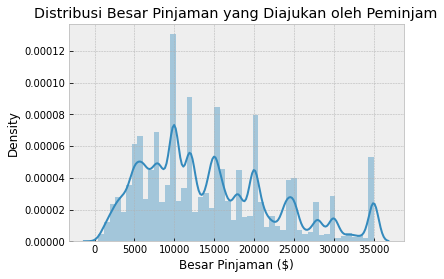

In [170]:
# Buat data histogram
loan_amount, funded_amount, investor_committment = loan_df['loan_amnt'], loan_df['funded_amnt'], loan_df['funded_amnt_inv']

# Create distplot
sns.distplot(loan_amount)
plt.title("Distribusi Besar Pinjaman yang Diajukan oleh Peminjam")
plt.xlabel("Besar Pinjaman ($)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


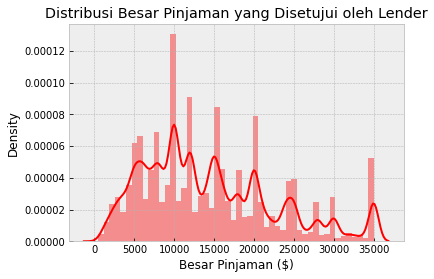

In [171]:
sns.distplot(funded_amount, color = 'red')
plt.title("Distribusi Besar Pinjaman yang Disetujui oleh Lender")
plt.xlabel("Besar Pinjaman ($)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


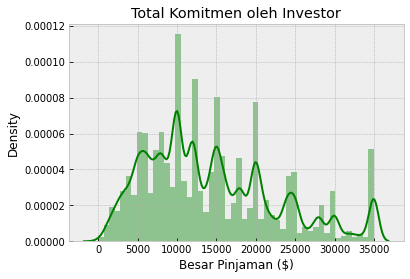

In [172]:
sns.distplot(investor_committment, color = 'green')
plt.title("Total Komitmen oleh Investor")
plt.xlabel("Besar Pinjaman ($)")
plt.show()

Ketiga grafik variabel tersebut identik, jadi semua pinjaman yang diajukan sesuai dengan yang diberikan oleh Lender

### Volume Peminjam
Pada bagian ini akan dilihat jumlah peminjam dari hari ke hari

In [173]:
# Ubah ke datetime
loan_df['issue_d'] = [date[:4] + '20' + date[4:] for date in loan_df['issue_d']]
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = "%b-%Y")
loan_df['issue_d']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, Length: 466285, dtype: datetime64[ns]

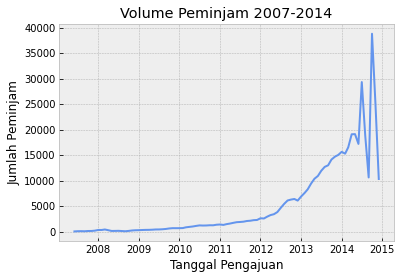

In [174]:
# Groupby Issue_d
volume_peminjam_per_bulan = loan_df.groupby('issue_d')['id'].count().to_frame().reset_index()

# Buat Plot
plt.plot(volume_peminjam_per_bulan['issue_d'], volume_peminjam_per_bulan['id'], color = 'cornflowerblue')
plt.title("Volume Peminjam 2007-2014")
plt.xlabel("Tanggal Pengajuan")
plt.ylabel("Jumlah Peminjam")
plt.show()

Dari tahun ke tahun jumlah peminjam menaik, akan tetapi pada tahun 2014, jumlah peminjam sempat menaik drastis diikuti dengan penurunan drastis, penyebabnya bisa jadi dari syarat peminjaman yang dipersulit agar meminimalisir risiko dari pemberian pinjaman kepada peminjam

### Suku Bunga Lender
Disini akan dilihat suku bunga yang ditetapkan oleh Lender dari bulan ke bulan

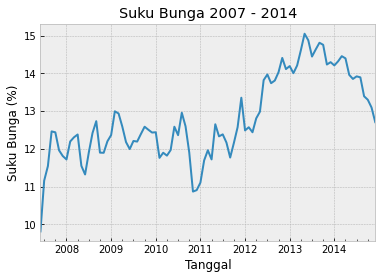

In [175]:
interest_rate_by_month = loan_df.groupby('issue_d')['int_rate'].mean()
interest_rate_by_month.plot()
plt.title("Suku Bunga 2007 - 2014")
plt.xlabel("Tanggal")
plt.ylabel("Suku Bunga (%)")
plt.show()

Seiring waktu suku bunganya fluktuatif hingga pada tahun 2014 menunjukkan tren menurun. Mungkin ini digunakan untuk menarik kembali peminjam agar mau mengajukan pinjaman ke pihak Lender

### Volume Default dan Current

In [176]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

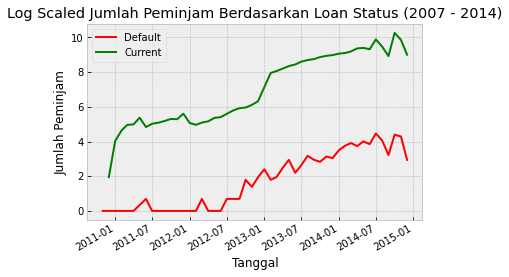

In [177]:
# Subset peminjam yang default
default_df = loan_df[loan_df['loan_status'] == 'Default']
current_df = loan_df[loan_df['loan_status'] == 'Current']

# Group by tanggal dan lakukan transformasi logaritma
volume_default = np.log(default_df.groupby('issue_d')['id'].count())
volume_current= np.log(current_df.groupby('issue_d')['id'].count())

# Plot
volume_default.plot(color = 'red', label = 'Default')
volume_current.plot(color = 'green', label = 'Current')

plt.title("Log Scaled Jumlah Peminjam Berdasarkan Loan Status (2007 - 2014)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjam")
plt.legend()
plt.show()

Dapat dilihat bahwa Lender ini memiliki lebih banyak peminjam current (peminjam yang mengembalikan pinjamannya tepat waktu) dibandingkan peminjam default

### Tujuan Peminjaman

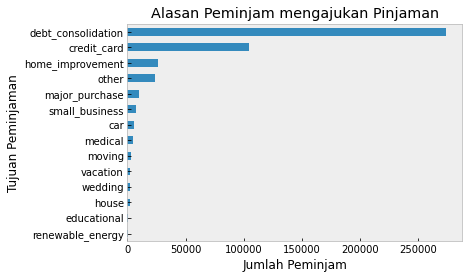

In [178]:
volume_purpose = loan_df.groupby('purpose')['id'].count().sort_values(ascending = True)
volume_purpose.plot(kind = 'barh')
plt.ylabel("Tujuan Peminjaman")
plt.xlabel("Jumlah Peminjam")
plt.title("Alasan Peminjam mengajukan Pinjaman")
plt.grid(False)
plt.show()

Kebanyakan peminjam ingin meminjam untuk membayar hutang lainnya yang dimiliki oleh peminjam tersebut. Alasan terbanyak selanjutnya adalah untuk kartu kredit, renovasi rumah

### Persebaran Pinjaman yang Bermasalah
Pinjaman yang bermasalah ini dipicu oleh peminjam yang gagal mengembalikan pinjamannya pada waktu yang telah ditetapkan, ada 5 kategori mengenai peminjaman yang bermasalah yakni:

1. Charged Off : Pinjaman diperkirakan tidak lunas oleh pihak peminjam
2. Default : Peminjam gagal mengembalikan pinjaman dalam periode waktu lebih dari 120 hari
3. Late : Peminjam gagal mengembalikan pinjaman dalam periode 16 - 120 hari
4. Grace Period : Peminjam masih diberikan waktu untuk melunasi pinjamannya

Berikut adalah persebaran pinjaman yang bermasalah


In [179]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


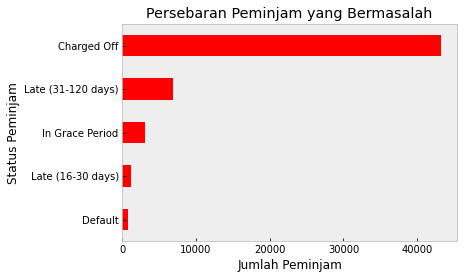

In [180]:
# Ubah kategori yang "Does not meet the credit policy"
loan_df['loan_status'] = loan_df['loan_status'].str.replace('Does not meet the credit policy. Status:Fully Paid','Fully Paid')
loan_df['loan_status'] = loan_df['loan_status'].str.replace('Does not meet the credit policy. Status:Charged Off','Charged Off')

# Subset ke pinjaman yang bermasalah
delinquent_loans = ['Charged Off','Default','Late (31-120 days)','In Grace Period','Late (16-30 days)']
delinquent_df = loan_df[loan_df['loan_status'].isin(delinquent_loans)]

# Liat persebarannya
volume_delinquents = delinquent_df.groupby('loan_status')['id'].count().sort_values()
volume_delinquents.plot(kind = 'barh', color = 'red')
plt.xlabel("Jumlah Peminjam")
plt.ylabel("Status Peminjam")
plt.title("Persebaran Peminjam yang Bermasalah")
plt.grid(False)
plt.show()

Paling banyak peminjam bertipe Charged Off (berarti peminjam ini sudah dipastikan oleh Lender akan bermasalah dalam pengembalian pinjamannya)

### Persebaran Loan Grades

Loan Grades adalah peringkat yang diberikan oleh Lender kepada peminjam berdasarkan track record mereka dalam melunasi pinjaman

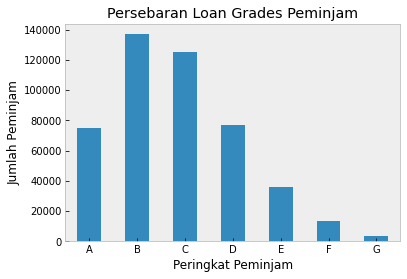

In [181]:
volume_grades = loan_df.groupby('grade')['id'].count()
volume_grades.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel("Peringkat Peminjam")
plt.ylabel("Jumlah Peminjam")
plt.title("Persebaran Loan Grades Peminjam")
plt.grid(False)
plt.show()

Paling banyak peminjam terkategorikan B diikuti dengan C, tapi dari peminjam yang bermasalah tersebut bagaimana peringkatnya, mari kita lihat

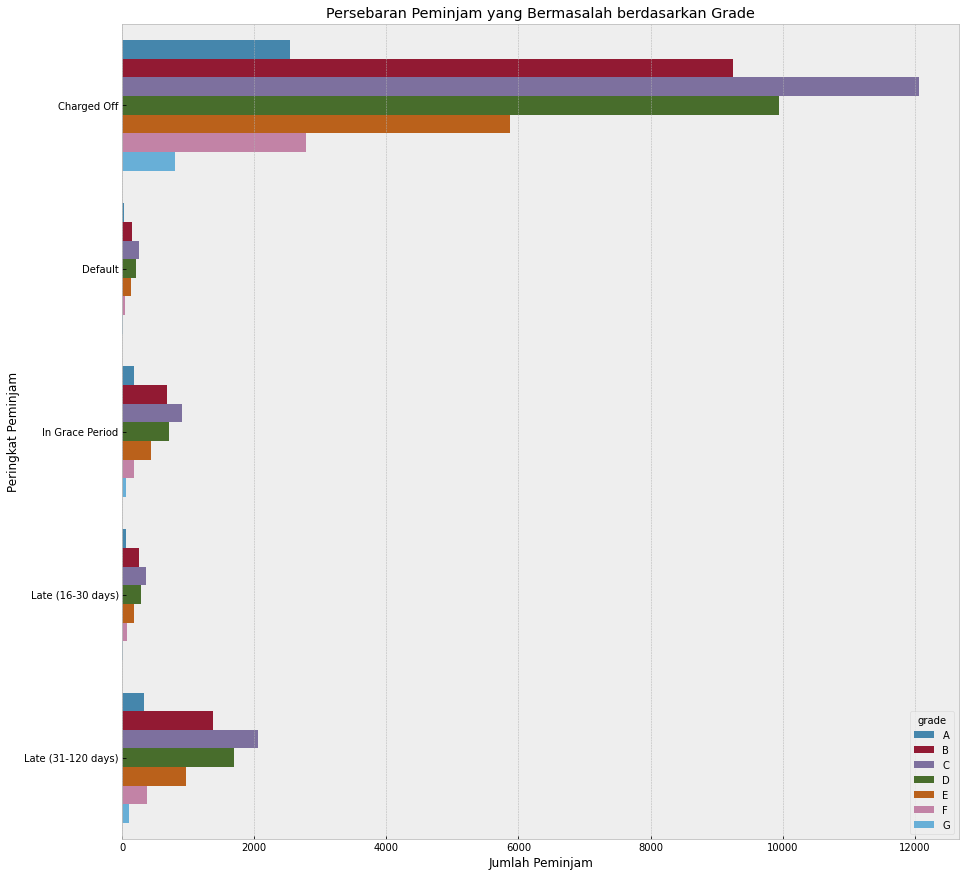

In [182]:
volume_grades_delinquent = delinquent_df.groupby(['grade','loan_status'])['id'].count().to_frame().reset_index()

plt.figure(figsize = (15,15))
sns.barplot(data = volume_grades_delinquent, x = 'id', y = 'loan_status', hue = 'grade')
plt.xlabel("Jumlah Peminjam")
plt.ylabel("Peringkat Peminjam")
plt.title("Persebaran Peminjam yang Bermasalah berdasarkan Grade")
plt.show()

Ada beberapa peminjam yang berperingkat A tetapi terkategorikan sebagai peminjam yang bermasalah, 

Peminjam berperingkat C dominan menjadi peminjam yang bermasalah, diikuti oleh peminjam D. Anehnya peminjam berperingkat G justru memiliki paling sedikit peminjam yang bermasalah

Dengan asumsi bahwa peminjam A sangat baik dan peminjam G sangat bermasalah, maka Grade tidak mencerminkan kemampuan peminjam dalam mengembalikan pinjaman

### Annual Income Peminjam

Di bagian ini akan dilihat annual income peminjam dan dilihat perbandingannya dengan jumlah yang akan dipinjamkan, risiko peminjaman dan grade

#### Hubungannya dengan Loan Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


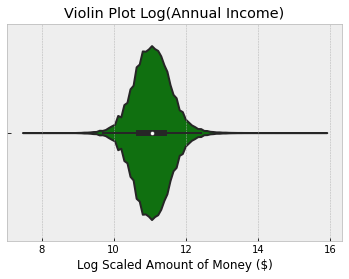

In [183]:
# Liat distribusi annual income dan loan amount
sns.violinplot(np.log(loan_df['annual_inc']), color = 'green')
plt.xlabel("Log Scaled Amount of Money ($)")
plt.title("Violin Plot Log(Annual Income)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


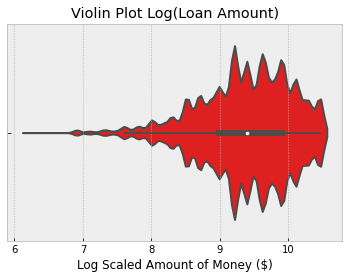

In [184]:
sns.violinplot(np.log(loan_df['loan_amnt']), label = 'Loan Amount ($)', color = 'red')
plt.xlabel("Log Scaled Amount of Money ($)")
plt.title("Violin Plot Log(Loan Amount)")
plt.show()

Setelah ditransformasi oleh fungsi logaritmik, dapat dilihat bahwa terdapat hubungan berbanding lurus antara jumlah yang akan dipinjamkan

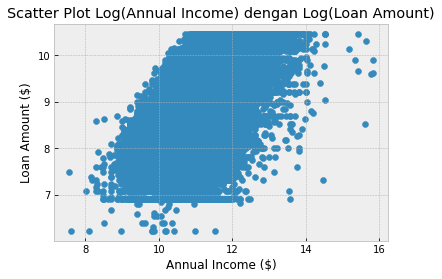

In [185]:
# Diagram pencar antara log annual income dan log loan amount
plt.scatter(np.log(loan_df['annual_inc']), np.log(loan_df['loan_amnt']))
plt.xlabel("Annual Income ($)")
plt.ylabel("Loan Amount ($)")
plt.title("Scatter Plot Log(Annual Income) dengan Log(Loan Amount)")
plt.show()

In [186]:
# Korelasi antara dua fitur tsb
print("Korelasi : ", np.log(loan_df['annual_inc']).corr(np.log(loan_df['loan_amnt'])))

Korelasi :  0.47623649990010153


Terdapat korelasi positif antara Annual Income peminjam dengan Jumlah uang yang akan dipinjamkan

#### Hubungannya dengan Risiko Pinjaman

Disini akan dilihat persebaran pendapatan dari peminjam yang bermasalah

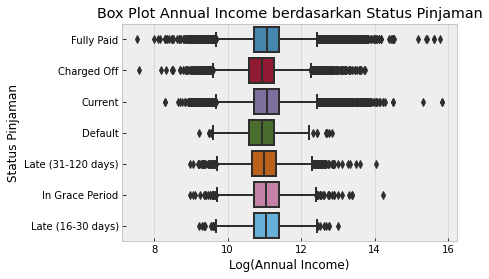

In [187]:
sns.boxplot(x = np.log(loan_df['annual_inc']), y = loan_df['loan_status'])
plt.title("Box Plot Annual Income berdasarkan Status Pinjaman")
plt.xlabel("Log(Annual Income)")
plt.ylabel("Status Pinjaman")
plt.show()

Dari box plot tampaknya terdapat banyak pencilan di setiap kategori, selain itu untuk yang statusnya fully paid dan current, median incomenya bernilai sama. Perhatikan untuk yang statusnya charged off, memiliki median income yang sama rendahnya dengan yang default

#### Hubungannya dengan Grade

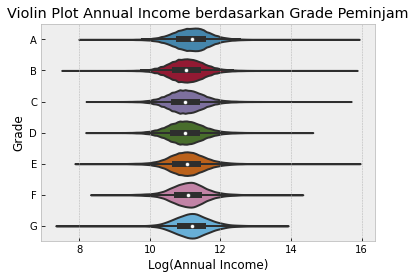

In [188]:
sns.violinplot(x = np.log(loan_df['annual_inc']), y = loan_df['grade'].sort_values())
plt.title("Violin Plot Annual Income berdasarkan Grade Peminjam")
plt.xlabel("Log(Annual Income)")
plt.ylabel("Grade")
plt.show()

Dapat dilihat bahwa peminjam grade A memiliki median Income yang hampir sama dengan peminjam grade G, padahal peminjam grade G risiko charged offnya paling tinggi

### Employment Title Peminjam
Akan dilihat distribusi pekerjaan dan employment length dari peminjam, asumsikan peminjam yang pekerjaannya tidak diketahui adalah peminjam yang menganggur

In [189]:
# Buat data baru
loan_df['emp_title'] = loan_df['emp_title'].str.lower().str.capitalize()
loan_df['emp_title'] = loan_df['emp_title'].str.replace('Rn','Registered Nurse')
no_na_df = loan_df.loc[:, ['emp_title']].fillna('Unknown')


count_job = no_na_df['emp_title'].value_counts().to_frame().reset_index()
count_job.columns = ['emp_title','counts']

In [190]:
'''
# save ke csv
loan_df.to_csv('loan_df_cleaned.csv')'''

"\n# save ke csv\nloan_df.to_csv('loan_df_cleaned.csv')"

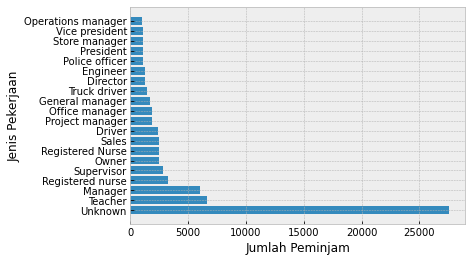

In [191]:
# Buat visualisasi
plt.barh(y = count_job['emp_title'][:20], width = count_job['counts'][:20])
plt.xlabel("Jumlah Peminjam")
plt.ylabel("Jenis Pekerjaan")
plt.show()

Dapat diamati bahwa paling banyak tidak diketahui, diikuti oleh guru dan manajer

# Data Preparation

## Split Data
Pada bagian ini akan displit data menjadi data training dan data testing lalu menerapkan data preprocessing pada kedua data tersebut. 

Alasannya adalah apabila kita preprocessing data keseluruhan, maka saat pembagian data menjadi training set dan testing set informasi yang seharusnya ada di testing set bocor di training set akibatnya terjadi kebocoran data yang dapat mengakibatkan overfitting model

In [192]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

### Label Encode variabel target
Pada bagian ini akan dilakukan label encoding untuk loan status, apabila loan status termasuk ke peminjaman yang bermasalah maka akan dilabelkan 1, apabila tidak maka akan dilabelkan 0, lebih lanjut


*   Fully paid dilabelkan 0 karena pembayaran telah lunas
*   Current dilabelkan 0 karena pembayaran dilakukan tepat waktu
*   Charged Off dilabelkan 1 karena pembayaran tidak akan dilakukan oleh peminjam 
*   Default dilabelkan 1 karena pembayaran default
*   Late dilabelkan 1 karena pembayaran telat dan ada kemungkinan akan default
*   In Grace Period dilabelkan 1 karena pembayaran telat dan ada kemungkinan akan default



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


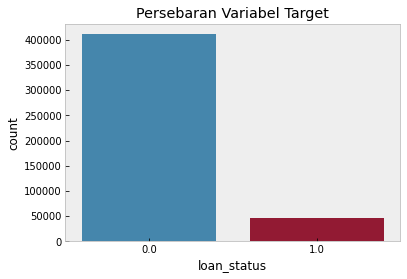

In [193]:
# split dulu datanya menjadi variabel prediktor dan variabel target
X = loan_df.drop('loan_status', axis = 1)
y = loan_df['loan_status']

# Bikin dict Target
dict_target = {'Fully Paid' : 0,
               'Current' : 0,
               'Charged Off' : 1,
               'Default' : 1,
               'Late' : 1,
               'In Grace Period' : 1}
               
# Label encoding
y = y.map(dict_target)

# Lihat persebarannya
sns.countplot(y)
plt.title("Persebaran Variabel Target")
plt.grid(False)
plt.show()

Ada ketidakseimbangan target dalam permasalahan klasifikasi ini jadi perlu ditangani saat pemodelan nanti dengan menggunakan algoritma SMOTE

In [194]:
y.isnull().sum()

8118

Ternyata ada null values di y nya, akan diisi dengan peminjaman yang bermasalah

In [195]:
y = y.fillna(1)

### Split Training dan Testing

In [196]:
# Karena terdapat ketidakseimbangan variabel target maka perlu distratify jadi variabel target memiliki proporsi kedua label target tersebut
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111, stratify = y)

In [197]:
X_train = X_train.reset_index().drop(['Unnamed: 0', 'index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_train = np.array(y_train).flatten()

X_test = X_test.reset_index().drop(['Unnamed: 0','index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)
y_test = np.array(y_test).flatten()

## Missing Values

Perhatikan bahwa ada fitur berisi missing values, pada bagian ini akan dilakukan :    
* Drop fitur yang mengandung 70% missing values
* Imputasi fitur yang masih mengandung missing values

### Drop Fitur Missing Values

Perhatikan bahwa ada fitur yang hanya berisi missing values, maka akan didrop fitur tersebut.

In [198]:
# Drop missing values di fitur yang memiliki semua nilai NA
most_na_train_features = [col for col in X_train.columns if (X_train[col].isna().sum()*100)/len(X_train) >= 70]
most_na_test_features = [col for col in X_test.columns if (X_test[col].isna().sum()*100)/len(X_test) >= 70]

X_train = X_train.drop(most_na_train_features, axis = 1)
X_test = X_test.drop(most_na_test_features, axis = 1)

print("Feature training shape: ",X_train.shape)
print("Feature testing shape: ",X_test.shape)

Feature training shape:  (326399, 53)
Feature testing shape:  (139886, 53)


Kini ada 55 fitur yang tersedia, mari kita lihat persebaran null valuesnya kembali

In [199]:
# Training null values
X_train.isnull().sum().sort_values()

id                                 0
addr_state                         0
dti                                0
policy_code                        0
revol_bal                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
zip_code                           0
purpose                            0
application_type                   0
funded_amnt                        0
url                                0
installment                        0
int_rate                           0
term                               0
home_ownership                     0
funded_amnt_inv                    0
sub_grade                          0
g

Masih ada beberapa fitur yang mengandung missing values, akan dilakukan imputasi pada fitur-fitur tersebut


NOTE : Unique values yang dilihat berasal dari data training, tapi imputasinya juga tetap berlaku untuk data testing

### Imputasi Missing Values

#### mths_since_last_delinq
Fitur ini menyatakan Jumlah bulan sejak peminjaman bermasalah terakhir peminjam. Mari kita lihat unique valuesnya

In [200]:
X_train['mths_since_last_delinq'].unique()

array([ nan,  19.,  49.,  14.,  31.,  60.,  76.,  26.,  68.,  15.,  39.,
         7.,  23.,  18.,  28.,  71.,   9.,  24.,  10.,  48.,  57.,  36.,
        27.,  81.,  12.,  69.,  47.,  37.,  11.,  58.,  40.,   1.,  44.,
        52.,  38.,  21.,  20.,  16.,   5.,  33.,  45.,  74.,  30.,   0.,
        13.,  72.,  29.,   6.,  55.,  53.,  32.,   4.,  50.,  64.,  22.,
        17.,  35.,  56.,  51.,  77.,  80.,  34.,  43.,  99.,  65.,  25.,
        61.,  66.,  75.,   8.,   3.,  42.,  41.,  73.,  46.,  79.,  78.,
        70.,  63.,  59.,  54.,  62.,   2.,  67., 105., 103.,  82.,  83.,
       130., 119.,  91.,  85.,  86., 114.,  93., 151.,  88.,  87., 104.,
       120., 188.,  97., 111.,  84., 108., 135., 148.,  90.,  95.,  92.,
       127., 107.,  94., 131.,  96., 124., 100.,  89., 106., 126., 139.,
       101., 113., 121., 116., 115., 110., 102., 156., 170., 159., 140.,
       133., 143., 122., 134.,  98., 109., 118., 149., 141.])

Ada beberapa alasan kenapa fitur tersebut bernilai NaN,
* Informasi yang kurang lengkap dari peminjam
* Peminjam yang memang sangat patuh pada deadline sehingga ia tidak pernah telat mengembalikan pinjamannya
Mari kita lihat lebih lanjut peminjam apa yang fiturnya bernilai NaN

In [201]:
missing_mths_last_delinq = X_train[X_train['mths_since_last_delinq'].isna() == True]
missing_mths_last_delinq.groupby('grade')['id'].count()

grade
A    35797
B    52066
C    44256
D    25795
E    11799
F     4333
G     1016
Name: id, dtype: int64

Menariknya, peminjam yang fiturnya bernilai NaN sebagian besar berasal dari grade B, C dan A, jadi peminjamnya cenderung menepati deadline jika dilihat dari peringkat ini. Strategi untuk mengisi null values disini bisa dengan mengikuti peringkatnya, mari kita lihat rerata bulannya untuk setiap grade

In [202]:
dict(X_train.groupby('grade')['mths_since_last_delinq'].median())

{'A': 34.0, 'B': 32.0, 'C': 30.0, 'D': 30.0, 'E': 29.0, 'F': 28.0, 'G': 25.0}

Hasil di atas cukup masuk akal karena grade A adalah peminjam yang berkualitas jadinya waktu sejak peminjaman bermasalahnya paling lama dibandingkan dengan grade lainnya

In [203]:
# Imputasi dengan grade
def mths_since_last_delinq_imputer(data):
  # Group by grade dan hitung median mths_since_last_delinq
  grade_mths_since_last_delinq = data.groupby('grade')['mths_since_last_delinq'].median()
  dict_grade_mths_since_last_delinq = dict(grade_mths_since_last_delinq)

  # Isi missing values berdasarkan gradenya
  for i in range(len(data)):
    if pd.isna(data['mths_since_last_delinq'][i]) == True:
      data['mths_since_last_delinq'][i] = dict_grade_mths_since_last_delinq[data['grade'][i]]
  
  # return data
  return data

In [204]:
X_train = mths_since_last_delinq_imputer(X_train)
X_test = mths_since_last_delinq_imputer(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [205]:
# Sanity Check
X_train['mths_since_last_delinq'].isnull().sum()

0

Semua missing values telah diimputasi di fitur tersebut

#### next_pymnt_d
Fitur ini menyatakan tanggal pembayaran terjadwal berikutnya, mari kita lihat persebarannya

In [206]:
X_train['next_pymnt_d'].unique()

array(['Feb-16', nan, 'Jan-16', 'Jun-09', 'Apr-10', 'Nov-09', 'Apr-11',
       'Jun-11', 'Oct-12', 'Aug-10', 'Sep-12', 'Jan-12', 'Dec-09',
       'May-11', 'Nov-10', 'Jul-11', 'Apr-13', 'Mar-12', 'Apr-12',
       'Feb-12', 'Aug-12', 'Oct-11', 'Sep-13', 'Sep-11', 'Aug-13',
       'Oct-09', 'Jun-12', 'Jun-10', 'Aug-11', 'Jan-08', 'Jan-15',
       'Nov-12', 'Mar-11', 'Dec-10', 'Mar-10', 'Dec-08', 'Oct-13',
       'Dec-11', 'Feb-11', 'Apr-09', 'Nov-11', 'Jan-10', 'May-13',
       'Sep-09', 'Jul-10', 'Jan-11', 'May-12', 'Jun-13', 'Jul-12',
       'Aug-15', 'May-15', 'Sep-15', 'Sep-10', 'Mar-14', 'Sep-14',
       'Nov-13', 'Oct-10', 'Dec-13', 'Feb-10', 'Jun-15', 'Oct-15',
       'Mar-13', 'Jul-09', 'Feb-13', 'Jan-09', 'Jan-13', 'Mar-16',
       'Jul-13', 'Apr-14', 'May-09', 'Apr-15', 'Feb-14', 'Nov-14',
       'Feb-15', 'Dec-12', 'Oct-08', 'Aug-08', 'Dec-14', 'Mar-15',
       'Aug-14', 'Aug-09', 'Jan-14', 'Mar-09', 'Apr-08', 'May-10',
       'Oct-14', 'May-14', 'Sep-08', 'Nov-08', 'Nov-15', 

Ada penyebab nilai tersebut NaN
* Peminjam yang bersangkutan telah dianggap Charged Off oleh pihak Lender
* Kurang informasi dari peminjam

Alasan yang mungkin adalah yang pertama, oleh karena itu isi saja dengan akhir tahun 2016. Selain itu, untuk mengubahnya menjadi numerik, maka kita akan mengubah fitur tersebut menjadi datetime lalu dapatkan selisih harinya dengan akhir 2016, jika selisihnya 0 itu berarti kemungkinan besar peminjam tersebut charged off

In [207]:
def next_payment_day_imputer(data):
  data['next_pymnt_d'] = data['next_pymnt_d'].fillna("Dec-16")
  data['next_pymnt_d'] = [date[:4] + '20' + date[4:] for date in data['next_pymnt_d']]
  data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'], format = "%b-%Y")
  data['diff_next_pymnt_d'] = pd.to_datetime('2016-12-01') - data['next_pymnt_d']
  data['diff_next_pymnt_d'] = data['diff_next_pymnt_d'].dt.days
  return data

In [208]:
X_train = next_payment_day_imputer(X_train)
X_test = next_payment_day_imputer(X_test)

In [209]:
X_train.drop('next_pymnt_d', axis = 1, inplace = True)
X_test.drop('next_pymnt_d', axis = 1, inplace = True)

#### total_rev_hi_lim

Fitur ini menyatakan Total Batas Kredit/Kredit Tinggi Revolving, berikut adalah persebaran unique valuesnya

In [210]:
X_train['total_rev_hi_lim'].unique()

array([ 37200.,  14100.,  26800., ...,  50690., 106950.,  22059.])

Jika dilihat dari gradenya

In [211]:
X_train.groupby('grade')['total_rev_hi_lim'].median()

grade
A    34800.0
B    23400.0
C    20700.0
D    19400.0
E    20200.0
F    19700.0
G    21200.0
Name: total_rev_hi_lim, dtype: float64

Makin tinggi gradenya batas kreditnya juga makin tinggi, imputasi dengan melihat nilai grade bisa jadi solusi yang baik

In [212]:
# Imputasi dengan grade
def total_rev_hi_lim_impute(data):
  # Group by grade dan hitung median mths_since_last_delinq
  grade_total_rev_hi_lim = data.groupby('grade')['total_rev_hi_lim'].median()
  dict_grade_total_rev_hi_lim = dict(grade_total_rev_hi_lim)

  # Isi missing values berdasarkan gradenya
  for i in range(len(data)):
    if pd.isna(data['total_rev_hi_lim'][i]) == True:
      data['total_rev_hi_lim'][i] = dict_grade_total_rev_hi_lim[data['grade'][i]]
  
  # return data
  return data

In [213]:
X_train = total_rev_hi_lim_impute(X_train)
X_test = total_rev_hi_lim_impute(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### tot_coll_amt
Fitur ini menyatakan Total jumlah pengumpulan yang pernah ada, gunakan strategi yang sama seperti fitur numerik sebelumnya

In [214]:
# Imputasi dengan grade
def tot_coll_amt_impute(data):
  # Group by grade dan hitung median mths_since_last_delinq
  grade_tot_coll_amt = data.groupby('grade')['tot_coll_amt'].median()
  dict_grade_tot_coll_amt = dict(grade_tot_coll_amt)

  # Isi missing values berdasarkan gradenya
  for i in range(len(data)):
    if pd.isna(data['tot_coll_amt'][i]) == True:
      data['tot_coll_amt'][i] = dict_grade_tot_coll_amt[data['grade'][i]]
  
  # return data
  return data

In [215]:
X_train = tot_coll_amt_impute(X_train)
X_test = tot_coll_amt_impute(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [216]:
X_train.isnull().sum().sort_values()

id                                0
dti                               0
total_rev_hi_lim                  0
revol_bal                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
tot_coll_amt                      0
addr_state                        0
zip_code                          0
mths_since_last_delinq            0
purpose                           0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                    

#### tot_cur_bal
Fitur ini menyatakan Total Saldo Saat Ini dari Semua Akun, gunakan strategi yang sama lagi

In [217]:
# Imputasi dengan grade
def tot_cur_bal_impute(data):
  # Group by grade dan hitung median mths_since_last_delinq
  grade_tot_cur_bal = data.groupby('grade')['tot_cur_bal'].median()
  dict_grade_tot_cur_bal = dict(grade_tot_cur_bal)

  # Isi missing values berdasarkan gradenya
  for i in range(len(data)):
    if pd.isna(data['tot_cur_bal'][i]) == True:
      data['tot_cur_bal'][i] = dict_grade_tot_cur_bal[data['grade'][i]]
  
  # return data
  return data

In [218]:
X_train = tot_cur_bal_impute(X_train)
X_test = tot_cur_bal_impute(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### emp_title
Fitur ini menyatakan pekerjaan dari peminjam, mari kita lihat persebarannya

In [219]:
X_train['emp_title'].value_counts()[:30]

Teacher                     4656
Manager                     4219
Registered nurse            2278
Supervisor                  2010
Sales                       1712
Owner                       1705
Registered Nurse            1705
Driver                      1629
Project manager             1315
Office manager              1307
General manager             1204
Truck driver                1077
Director                     915
Engineer                     907
Police officer               791
President                    790
Store manager                750
Operations manager           746
Vice president               741
Sales manager                718
Administrative assistant     678
Us army                      667
Attorney                     641
Accountant                   640
Technician                   616
Nurse                        598
Mechanic                     596
Account manager              582
Assistant manager            546
Executive assistant          479
Name: emp_

Ada banyak unique values, tapi ada yang memiliki NaN, ini indikasi berarti peminjam tidak memiliki pekerjaan (alias pengangguran) atau kurangnya informasi dari data, untuk saat ini anggap yang NaN values itu tidak diketahui/Unknown

In [220]:
X_train['emp_title'] = X_train['emp_title'].fillna("Unknown")
X_test['emp_title'] = X_test['emp_title'].fillna("Unknown")

#### emp_length
Fitur ini menyatakan lama peminjam bekerja, mari kita lihat persebarannya

In [221]:
X_train['emp_length'].value_counts()

10+ years    105006
2 years       28864
3 years       25674
< 1 year      25471
5 years       21624
1 year        20715
4 years       19612
7 years       18228
6 years       18226
8 years       15745
9 years       12552
Name: emp_length, dtype: int64

In [222]:
string = '8 years'
import re

string_new = re.sub('years*','', string)
string_new

'8 '

Tipe datanya berupa diskrit dan perlu dibersihkan terlebih dahulu 

In [223]:
def emp_length_string_cleaner(string):
  string = string.replace("< 1 year",'0')
  string = re.sub(r'years*','',string)
  string = re.sub(r'\+','',string)
  string = string.strip()
  string = float(string)
  return string

Ide imputasi juga sama seperti fitur sebelumnya hanya saja ini digroupby dengan employment title peminjamnya 

In [224]:
def emp_length_imputer(data):
  data_not_na = data[data['emp_length'].isna() == False].reset_index().drop('index', axis = 1)
  data_not_na['emp_length'] = data_not_na['emp_length'].apply(emp_length_string_cleaner)
  dict_median_emp_length = dict(data_not_na.groupby('emp_title')['emp_length'].median())

  for i in range(len(data)):
    if pd.isna(data['emp_length'][i]) == True :
      if data['emp_title'][i] not in dict_median_emp_length:
        data['emp_length'][i] = '0'
      else:
        data['emp_length'][i] = str(dict_median_emp_length[data['emp_title'][i]])
  
  data['emp_length'] = data['emp_length'].apply(emp_length_string_cleaner)
  return data

In [225]:
X_train = emp_length_imputer(X_train)
X_test = emp_length_imputer(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [226]:
X_train['emp_length'].unique()

array([ 8. ,  6. , 10. ,  3. ,  2. ,  9. ,  7. ,  4. ,  0. ,  5. ,  1. ,
        3.5,  0.5,  2.5,  6.5,  9.5,  8.5])

#### Fitur sisanya
Mari kita lihat lagi fitur missing values sisanya

In [227]:
X_train.isnull().sum().sort_values()

id                              0
total_rev_hi_lim                0
revol_bal                       0
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_recovery_fee         0
last_pymnt_amnt                 0
policy_code                     0
application_type                0
tot_coll_amt                    0
tot_cur_bal                     0
dti                             0
addr_state                      0
mths_since_last_delinq          0
emp_length                      0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade         

Berikut fitur-fitur yang masih mengandung missing values :    
* last_pymnt_d : Last month payment was received
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections
* last_credit_pull_d : The most recent month LC (Lender) pulled credit for this loan
* open_acc : The number of open credit lines in the borrower's credit file.
* delinq_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* earliest_cr_line : The month the borrower's earliest reported credit line was opened
* acc_now_delinq : The number of accounts on which the borrower is now delinquent.
* inq_last_6mths : Number of credit inquiries in past 12 months
* total_acc : The total number of credit lines currently in the borrower's credit file
* pub_rec : Number of derogatory public records
* title :  The loan title provided by the borrower  
* annual_inc : The self-reported annual income provided by the borrower during registration.

Mari kita lihat modusnya

In [228]:
another_na_features = ['last_pymnt_d','revol_util','collections_12_mths_ex_med',
                       'last_credit_pull_d','open_acc','delinq_2yrs','earliest_cr_line',
                       'acc_now_delinq','inq_last_6mths','total_acc','pub_rec',
                       'title','annual_inc']

for col in another_na_features:
  print("Modus fitur {} :".format(col))
  print(loan_df[col].value_counts().index[0])
  print("")

Modus fitur last_pymnt_d :
Jan-16

Modus fitur revol_util :
0.0

Modus fitur collections_12_mths_ex_med :
0.0

Modus fitur last_credit_pull_d :
Jan-16

Modus fitur open_acc :
9.0

Modus fitur delinq_2yrs :
0.0

Modus fitur earliest_cr_line :
Oct-00

Modus fitur acc_now_delinq :
0.0

Modus fitur inq_last_6mths :
0.0

Modus fitur total_acc :
21.0

Modus fitur pub_rec :
0.0

Modus fitur title :
Debt consolidation

Modus fitur annual_inc :
60000.0



Karena ada banyak fitur yang perlu diimputasi, maka isi saja dengan modusnya

In [229]:
# Buat fungsi imputasi modus
def feature_mode_imputer(data, feature):
  data[feature] = data[feature].fillna(data[feature].value_counts().index[0])
  return data

# Terapkan pada setiap kolom yang mengandung null values
for col in another_na_features:
  X_train = feature_mode_imputer(X_train, col)
  X_test = feature_mode_imputer(X_test, col)

Masih ada fitur tanggal yang bisa juga diubah ke numerik, 

In [230]:
def date_to_int(data, date_feature):
  data[date_feature] = [date[:4] + '20' + date[4:] if date[-2] == '0' or (date[-2] == '1' and date[-1] <= '6') else date[:4] + '19' + date[4:] for date in data[date_feature]]
  data[date_feature] = pd.to_datetime(data[date_feature], format = "%b-%Y")
  data[date_feature] = pd.to_datetime('2016-12-01') - data[date_feature]
  data[date_feature] = data[date_feature].dt.days  
  return data

In [231]:
date_columns = ['last_pymnt_d','last_credit_pull_d','earliest_cr_line']

for col in date_columns:
  X_train = date_to_int(X_train, col)
  X_test = date_to_int(X_test, col)

# Sanity Check
X_train[date_columns]

,last_pymnt_d,last_credit_pull_d,earliest_cr_line
0,335,335,6424
1,366,335,2375
2,335,335,7215
3,335,335,5267
4,549,366,6485
...,...,...,...
326394,366,335,6850
326395,1096,1065,9619
326396,853,335,6148
326397,761,457,6697


In [232]:
mask = X_train['earliest_cr_line'] < 0
X_train[mask]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,diff_next_pymnt_d


### Cek Null Values lagi

In [233]:
print("Missing values in training data : \n", X_train.isnull().sum())
print("Missing values in testing data : \n", X_test.isnull().sum())

Missing values in training data : 
 id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revo

Semua null values sudah ditangani

## Feature Engineering

### Feature Selection


#### Redundant Features
Ada beberapa fitur yang redundant
* id (sudah diwakili oleh entri data),
* member_id (sudah diwakili oleh entri data,
* sub_grade (karena redundant dengan grade)
* issue_d (rekor tanggal sudah diwakili dengan yang lain)
* pymnt_plan 
* url
* title (redundant dengan purpose)
* zip_code
* addr_state

In [234]:
X_train.iloc[:,:20].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,purpose,title
0,11404701,13336855,16000,16000,15925.0,36 months,7.90,500.65,A,A4,Officer,8.0,MORTGAGE,53000.0,Source Verified,2014-01-01,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing
1,19105382,21308133,6000,6000,6000.0,36 months,13.35,203.18,C,C2,Driver,6.0,RENT,56000.0,Verified,2014-06-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation
2,3096419,3768803,3000,3000,3000.0,36 months,12.12,99.82,B,B3,Silgan containers inc.,10.0,MORTGAGE,50000.0,Not Verified,2013-01-01,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,CREDIT CARD CONSOLIDATION
3,13878081,15930405,12000,12000,12000.0,36 months,12.49,401.39,B,B4,Office manager,10.0,MORTGAGE,65000.0,Not Verified,2014-04-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation
4,36078320,38789845,8000,8000,8000.0,36 months,14.99,277.29,C,C5,Store manager,10.0,MORTGAGE,44000.0,Source Verified,2014-11-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation


In [235]:
# Drop features
X_train = X_train.drop(['id','member_id','sub_grade','issue_d','pymnt_plan','url','title','zip_code','addr_state'], axis = 1)
X_test = X_test.drop(['id','member_id','sub_grade','issue_d','pymnt_plan','url','title','zip_code','addr_state'], axis = 1)

In [236]:
X_train.shape

(326399, 44)

Fitur sisa yang akan digunakan ada 44 fitur tapi ini masih terlalu banyak, maka dari itu perlu dilakukan Feature Selection

### Feature Manipulation
Fitur term dapat diubah menjadi numerik dengan menghilangkan kata 'months'

#### Term

In [237]:
X_train['term'] = X_train['term'].str.replace(r'months','').str.strip().astype('int64')
X_test['term'] = X_test['term'].str.replace(r'months','').str.strip().astype('int64')

In [238]:
X_train['term']

0         36
1         36
2         36
3         36
4         36
          ..
326394    60
326395    36
326396    36
326397    36
326398    36
Name: term, Length: 326399, dtype: int64

#### Grade
Fitur ini akan diubah menjadi rataan dari peminjam yang default 

In [239]:
pd.Series(y_train)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
326394    0.0
326395    0.0
326396    0.0
326397    0.0
326398    0.0
Length: 326399, dtype: float64

In [240]:
len(y_train)

326399

In [241]:
train = pd.concat([X_train, pd.Series(y_train)], axis = 1)
train = train.rename({0:'is_default'}, axis = 1)
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,diff_next_pymnt_d,is_default
0,16000,16000,15925.0,36,7.90,500.65,A,Officer,8.0,MORTGAGE,...,335,0.0,1,INDIVIDUAL,0.0,0.0,211643.0,37200.0,304,0.0
1,6000,6000,6000.0,36,13.35,203.18,C,Driver,6.0,RENT,...,335,0.0,1,INDIVIDUAL,0.0,500.0,21107.0,14100.0,0,0.0
2,3000,3000,3000.0,36,12.12,99.82,B,Silgan containers inc.,10.0,MORTGAGE,...,335,0.0,1,INDIVIDUAL,0.0,0.0,83066.0,26800.0,0,0.0
3,12000,12000,12000.0,36,12.49,401.39,B,Office manager,10.0,MORTGAGE,...,335,0.0,1,INDIVIDUAL,0.0,0.0,297741.0,33400.0,304,0.0
4,8000,8000,8000.0,36,14.99,277.29,C,Store manager,10.0,MORTGAGE,...,366,0.0,1,INDIVIDUAL,0.0,0.0,125013.0,8800.0,0,0.0


In [242]:
# Groupby Grade
grade_default = train.groupby('grade')['is_default'].sum()/train.shape[0]
dict_grade_default = dict(grade_default)
dict_grade_default

{'A': 0.006743280463481812,
 'B': 0.025095052374547715,
 'C': 0.03341309256462183,
 'D': 0.027601187503638186,
 'E': 0.016204093762542164,
 'F': 0.007441812015355439,
 'G': 0.0021660605577835715}

In [243]:
# Map
X_train['grade'] = X_train['grade'].map(dict_grade_default)
X_test['grade'] = X_test['grade'].map(dict_grade_default)

# Modelling

Pada bagian ini akan dilakukan analisis prediktif terhadap masalah pinjaman yang default, recall kembali model-model yang akan kita gunakan adalah
1. Model Linear :
  * Logistic Regression
  * Support Vector Machine (SVM) Classifier
  * Linear Discriminant Analysis (LDA) Classifier
2. Model Tree :
  * Decision Tree Classifier
  * Random Forest Classifier
  * Extreme Gradient Boosting (XGBoost) Classifier

Karena strategi encoding untuk model linear berbeda dengan model tree, maka akan digunakan Pipeline dimana model linear akan menggunakan One Hot Encoding dan Model Tree akan menggunakan Label Encoding

In [244]:
over = SMOTE()
under = RandomUnderSampler()

## Model Linear

In [245]:
X_train_linear = pd.get_dummies(X_train.drop('emp_title', axis = 1))
X_test_linear = pd.get_dummies(X_test.drop('emp_title', axis = 1))


In [246]:
# Select 20 best feature
selector = SelectKBest(score_func = f_classif, k = 20)
selector.fit(X_train_linear, y_train)
cols = selector.get_support(indices = True)
X_train_linear= X_train_linear.iloc[:,cols]
X_test_linear = X_test_linear.reindex(labels = X_train_linear.columns, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [32 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [247]:
cols

array([ 3,  4,  8,  9, 12, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30,
       35, 36, 37])

In [248]:
X_train_linear

,term,int_rate,annual_inc,dti,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,diff_next_pymnt_d
0,36,7.90,53000.0,21.64,3.0,62.6,6217.92,6188.77,11514.950000,11460.97,9782.08,0.0,0.0,0.0,335,500.65,335,211643.0,37200.0,304
1,36,13.35,56000.0,22.45,0.0,40.1,0.00,0.00,6987.930000,6987.93,6000.00,0.0,0.0,0.0,366,3533.87,335,21107.0,14100.0,0
2,36,12.12,50000.0,10.22,0.0,57.2,0.00,0.00,3593.302492,3593.30,3000.00,0.0,0.0,0.0,335,99.60,335,83066.0,26800.0,0
3,36,12.49,65000.0,20.09,0.0,82.0,5547.60,5547.60,8429.190000,8429.19,6452.40,0.0,0.0,0.0,335,401.39,335,297741.0,33400.0,304
4,36,14.99,44000.0,39.74,0.0,53.1,0.00,0.00,8644.300000,8644.30,8000.00,0.0,0.0,0.0,549,6993.88,366,125013.0,8800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326394,60,18.24,100000.0,19.38,1.0,97.7,24042.96,24042.96,13017.410000,13017.41,5957.04,0.0,0.0,0.0,366,765.73,335,47860.0,16000.0,304
326395,36,7.51,35000.0,7.71,1.0,60.5,0.00,0.00,8335.180000,8335.18,7575.00,0.0,0.0,0.0,1096,3405.56,1065,144910.0,34800.0,0
326396,36,7.62,111000.0,8.41,0.0,36.3,0.00,0.00,26617.421600,26617.42,24000.00,0.0,0.0,0.0,853,8674.57,335,144910.0,34800.0,0
326397,36,13.11,81000.0,15.11,1.0,49.6,0.00,0.00,5779.626279,5779.63,5000.00,0.0,0.0,0.0,761,2915.46,457,138055.0,14900.0,0


### Analisis Korelasi

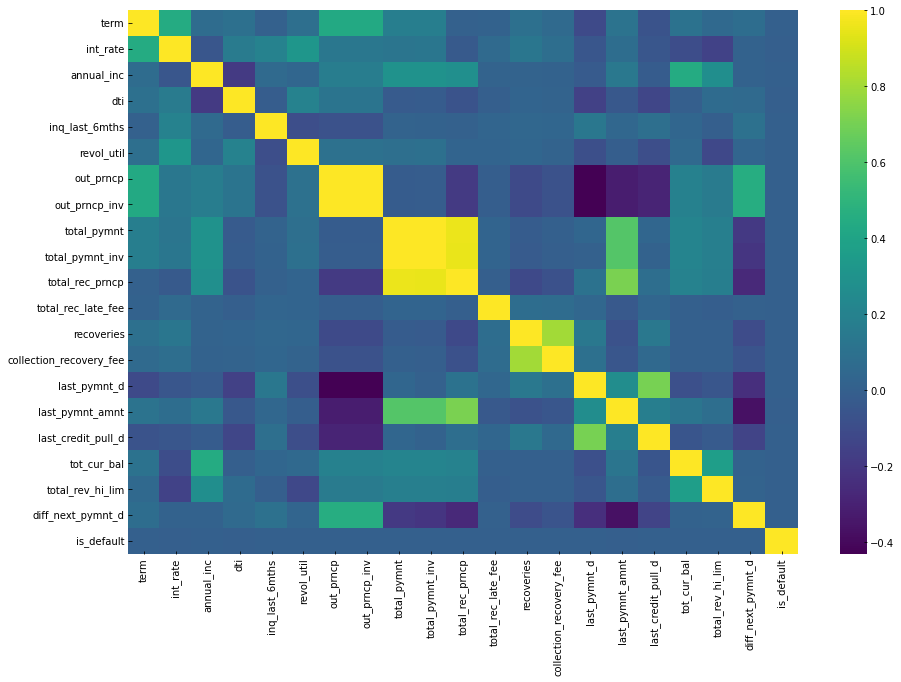

In [249]:
# Analisis Korelasi
plt.figure(figsize = (15,10))
data_linear = pd.concat([X_train_linear, X_test_linear], axis = 0)
data_linear['is_default'] = y
corr = data_linear.corr()
sns.heatmap(corr, cmap = 'viridis')
plt.show()

Beberapa fitur memiliki korelasi negatif yang signifikan seperti:
  * last_pymnt_d, last_pymnt_amnt, last_credit_pull_d dengan out_prncp
  * last_pymnt_amnt dengan diff_next_pymnt_d

Beberapa fitur juga memiliki korelasi positif yang signifikan seperti:
  * last_pymnt_amnt dengan total_rec_prncp
  * collection_recovery_fee dengan recoveries
  * last_credit_pull_d dengan last_pymnt_d

Terdapat 2 fitur yang menyebabkan masalah multikolinear, yakni total_pymnt_inv dan out_prncp_inv, drop kedua fitur tersebut

In [250]:
X_train_linear = X_train_linear.drop(['total_pymnt_inv','out_prncp_inv'], axis = 1)
X_test_linear = X_test_linear.drop(['total_pymnt_inv','out_prncp_inv'], axis = 1)

### Logistic Regression

#### Cross validation

In [251]:
# Buat Pipeline
logreg = LogisticRegression(max_iter = 1000)

pipeline_logreg = Pipeline(steps = [('scaler', StandardScaler()),
                                    ('over', over),
                                    ('under', under),
                                    ('model', logreg)])

scores_logreg = cross_val_score(pipeline_logreg, X_train_linear, y_train, scoring='roc_auc', cv=3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores_logreg))

Mean ROC AUC: 0.936


Skornya ROC-AUC bagus, kita coba fit

#### Diagnostic

In [252]:
# Fit
pipeline_logreg.fit(X_train_linear, y_train)

# Predict
y_predict_logreg = pipeline_logreg.predict(X_test_linear) 

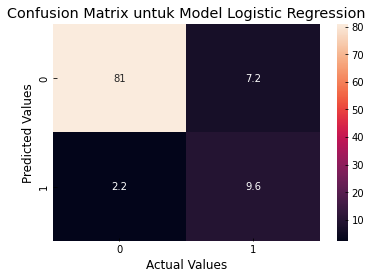

In [253]:
# Liat confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_predict_logreg)
conf_matrix_percentage_logreg = (conf_matrix_logreg/X_test_linear.shape[0])*100
sns.heatmap(conf_matrix_percentage_logreg, annot = True)
plt.title("Confusion Matrix untuk Model Logistic Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Dari confusion matrix di atas diperoleh hasil sebagai berikut :

* Sekitar 81% peminjam yang diprediksi tidak akan default dan peminjam tersebut memang tidak default

* Sekitar 7.1% peminjam yang diprediksi tidak akan default tetapi peminjam tersebut default 

* Sekitar 2.3% peminjam yang diprediksi akan default tetapi peminjam tersebut tidak default 

* Sekitar 9.6% peminjam yang diprediksi akan default dan peminjam tersebut default

Perhatikan bahwa model hanya dapat memprediksi sedikit peminjam yang akan default



In [254]:
# Liat classification reportnya
print(classification_report(y_test, y_predict_logreg))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95    123286
         1.0       0.57      0.81      0.67     16600

    accuracy                           0.91    139886
   macro avg       0.77      0.86      0.81    139886
weighted avg       0.93      0.91      0.91    139886



Akurasi yang diperoleh 91%, tetapi untuk metrik f1-score, precision dan recall terdapat kesenjangan persentase antara label peminjam yang default (0) dengan label peminjam yang tidak default (1) disebabkan oleh komposisi yang tidak seimbang antara peminjam default dan peminjam yang tidak default pada data tersebut



In [255]:
# Liat ROC-AUC Curve
## generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
## Prediksi peluangnya
y_pred_prob_lr = pipeline_logreg.predict_proba(X_test_linear)
## Ambil peluang untuk yang level 1
lr_probs = y_pred_prob_lr[:, 1]
## calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
## summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.936


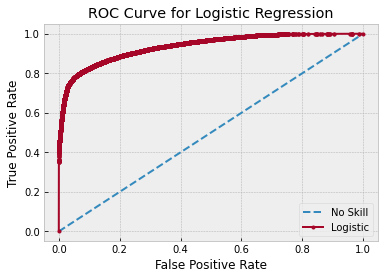

In [256]:
## calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
## plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.title("ROC Curve for Logistic Regression")
plt.show()

### Support Vector Machine

#### Cross Validation

In [ ]:
# Buat Pipeline
SVM = LinearSVC()

pipeline_svm = Pipeline(steps = [('scaler', StandardScaler()),
                                    ('over', over),
                                    ('under', under),
                                    ('model', SVM)])

scores_svm = cross_val_score(pipeline_svm, X_train_linear, y_train, scoring='roc_auc', cv=3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores_svm))

Skor ROC AUC juga sama untuk model ini

#### Diagnostic

In [ ]:
# Fit
pipeline_svm.fit(X_train_linear, y_train)

# Predict
y_predict_svm = pipeline_svm.predict(X_test_linear) 

In [ ]:
# Liat confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_predict_svm)
conf_matrix_percentage_svm = (conf_matrix_svm/X_test_linear.shape[0])*100
sns.heatmap(conf_matrix_percentage_svm, annot = True)
plt.title("Confusion Matrix untuk Model SVM")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Dari confusion matrix di atas diperoleh hasil sebagai berikut :

* Sekitar 82% peminjam yang diprediksi tidak akan default dan peminjam tersebut memang tidak default

* Sekitar 6.6% peminjam yang diprediksi tidak akan default tetapi peminjam tersebut default 

* Sekitar 2.3% peminjam yang diprediksi akan default tetapi peminjam tersebut tidak default 

* Sekitar 9.5% peminjam yang diprediksi akan default dan peminjam tersebut default

Perhatikan bahwa model hanya dapat memprediksi sedikit peminjam yang akan default

In [ ]:
# Liat classification reportnya
print(classification_report(y_test, y_predict_svm))

Perbedaan skor precision, recall, f1-score antara prediksi peminjam yang tidak default (label 0) dan yang default (label 1) tidak sejauh model regresi logistik. Dari akurasi juga lebih tinggi dibandingkan regresi logistik.

### Linear Discriminant Analysis

#### Cross Validation

In [ ]:
# Buat Pipeline
LDA = LinearDiscriminantAnalysis()

pipeline_lda = Pipeline(steps = [('scaler', StandardScaler()),
                                    ('over', over),
                                    ('under', under),
                                    ('model', LDA)])

scores_lda = cross_val_score(pipeline_lda, X_train_linear, y_train, scoring='roc_auc', cv=3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores_lda))

Skor ROC AUCnya lebih rendah dari model regresi logistik dan SVM

#### Diagnostic

In [ ]:
# Fit
pipeline_lda.fit(X_train_linear, y_train)

# Predict
y_predict_lda = pipeline_lda.predict(X_test_linear) 

In [ ]:
# Liat confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_predict_lda)
conf_matrix_percentage_lda = (conf_matrix_lda/X_test_linear.shape[0])*100
sns.heatmap(conf_matrix_percentage_lda, annot = True)
plt.title("Confusion Matrix untuk Model LDA")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Dari confusion matrix di atas diperoleh hasil sebagai berikut :

* Sekitar 76% peminjam yang diprediksi tidak akan default dan peminjam tersebut memang tidak default

* Sekitar 12% peminjam yang diprediksi tidak akan default tetapi peminjam tersebut default 

* Sekitar 2.4% peminjam yang diprediksi akan default tetapi peminjam tersebut tidak default 

* Sekitar 9.4% peminjam yang diprediksi akan default dan peminjam tersebut default

Perhatikan bahwa model hanya dapat memprediksi sedikit peminjam yang akan default

In [ ]:
# Liat classification reportnya
print(classification_report(y_test, y_predict_lda))

Perbedaan skor precision, recall, f1-scorenya cukup jomplang, akurasi juga lebih rendah dari model SVM dan regresi logistik

In [ ]:
# Liat ROC-AUC Curve
## generate a no skill prediction (majority class)
## Prediksi peluangnya
y_pred_prob_lda = pipeline_lda.predict_proba(X_test_linear)
## Ambil peluang untuk yang level 1
lda_probs = y_pred_prob_lr[:, 1]
## calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lda_auc = roc_auc_score(y_test, lda_probs)
## summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LDA: ROC AUC=%.3f' % (lda_auc))

In [ ]:
## calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_probs)
## plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lda_fpr, lda_tpr, marker='.', label='LDA')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.title("ROC Curve for Linear Discriminant Analysis")
plt.show()

## Model Tree

### Decision Tree Classifier

In [ ]:
# categorical columns
cat_col_train = [col for col in X_train.columns if X_train[col].dtypes == 'object']
cat_col_test = [col for col in X_test.columns if X_test[col].dtypes == 'object']

In [ ]:
# Label encoding
encoder = LabelEncoder()

# Buat copy Data Train
X_train_tree = X_train.copy()
for col in cat_col_train:
  encoder.fit(X_train[col])
  X_train_tree[col] = encoder.transform(X_train[col])

X_test_tree = X_test.copy()
for col in cat_col_train:
  encoder.fit(X_test[col])
  X_test_tree[col] = encoder.transform(X_test[col])


In [ ]:
# Select 20 best feature
selector = SelectKBest(score_func = f_classif, k = 20)
selector.fit(X_train_tree, y_train)
cols = selector.get_support(indices = True)
X_train_tree = X_train_tree.iloc[:,cols]
X_test_tree = X_test_tree.reindex(labels = X_train_tree.columns, axis = 1)

In [ ]:
X_train_tree = X_train_tree.drop(['total_pymnt_inv','out_prncp_inv'], axis = 1)
X_test_tree = X_test_tree.drop(['total_pymnt_inv','out_prncp_inv'], axis = 1)

#### Cross Validation

In [ ]:
''' # Proses Hyperparameter Tuning
dec_tree = DecisionTreeClassifier(max_leaf_nodes = None)

pipeline_dectree = Pipeline(steps = [('over', over),
                                    ('under', under),
                                    ('model', dectree)])

grid_dectree = {'max_depth' : [3,5,7,9,12], 
'model__min_samples_split' : [2,5,10],
'model__min_samples_leaf' : [1,2,5,10]}

dectree_cv = RandomizedSearchCV(pipeline_dectree, grid_dectree, scoring='roc_auc', cv = 3, random_state = 111)
dectree_cv.fit(X_train_tree, y_train)
'''

In [ ]:
# Buat Pipeline
dec_tree = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 1, max_leaf_nodes = None, max_depth = 12)

pipeline_dec_tree = Pipeline(steps = [('over', over),
                                    ('under', under),
                                    ('model', dec_tree)])

scores_dec_tree = cross_val_score(pipeline_dec_tree, X_train_tree, y_train, scoring='roc_auc', cv=3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores_dec_tree))

Skor ROC-AUC lebih tinggi dibandingkan semua model linear

#### Diagnostic

In [ ]:
# Predict
pipeline_dec_tree.fit(X_train_tree, y_train)
y_predict_dec_tree = pipeline_dec_tree.predict(X_test_tree) 

In [ ]:
# Liat confusion matrix
conf_matrix_dec_tree = confusion_matrix(y_test, y_predict_dec_tree)
conf_matrix_percentage_dec_tree = (conf_matrix_dec_tree/X_test_tree.shape[0])*100
sns.heatmap(conf_matrix_percentage_dec_tree, annot = True)
plt.title("Confusion Matrix untuk Model Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Dari confusion matrix di atas diperoleh hasil sebagai berikut :

* Sekitar 87% peminjam yang diprediksi tidak akan default dan peminjam tersebut memang tidak default

* Sekitar 1.4% peminjam yang diprediksi tidak akan default tetapi peminjam tersebut default 

* Sekitar 1.4% peminjam yang diprediksi akan default tetapi peminjam tersebut tidak default 

* Sekitar 11% peminjam yang diprediksi akan default dan peminjam tersebut default

Perhatikan bahwa model hanya dapat memprediksi sedikit peminjam yang akan default tetapi jauh lebih banyak dibandingkan model linear

In [ ]:
# Liat classification reportnya
print(classification_report(y_test, y_predict_dec_tree))

Perbedaan skor precision, recall, f1-scorenya tidak jomplang antara label 0 dan label 1, sementara akurasinya 97% :)

In [ ]:
# Liat ROC-AUC Curve
## generate a no skill prediction (majority class)
## Prediksi peluangnya
y_pred_prob_dectree = pipeline_dec_tree.predict_proba(X_test_tree)
## Ambil peluang untuk yang level 1
dectree_probs = y_pred_prob_dectree[:, 1]
## calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dectree_auc = roc_auc_score(y_test, dectree_probs)
## summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dectree_auc))

In [ ]:
## calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dectree_fpr, dectree_tpr, _ = roc_curve(y_test, dectree_probs)
## plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dectree_fpr, dectree_tpr, marker='.', label='Decision Tree')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.title("ROC Curve for Decision Tree Classifier")
plt.show()

### Random Forest Classifier

#### Cross Validation

In [ ]:
''' # Proses Hyperparameter Tuning
rforest = RandomForestClassifier(max_depth = 3)

pipeline_rforest = Pipeline(steps = [('over', over),
                                    ('under', under),
                                    ('model', rforest)])

grid_rforest = {'model__min_samples_split' : [2,5,10],
'model__min_samples_leaf' : [1,2,5,10]}

rforest_cv = RandomizedSearchCV(pipeline_rforest, grid_rforest, scoring='roc_auc', cv = 3, random_state = 111)
rforest_cv.fit(X_train_tree, y_train)
'''

In [ ]:
# Buat Pipeline
rforest = RandomForestClassifier(max_depth = 3, min_samples_split = 2, min_samples_leaf = 1)

pipeline_rforest = Pipeline(steps = [('over', over),
                                    ('under', under),
                                    ('model', rforest)])

scores_rforest = cross_val_score(pipeline_rforest, X_train_tree, y_train, scoring='roc_auc', cv=3, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores_rforest))

Diperoleh 'model__min_samples_split': 2, 'model__min_samples_leaf': 1 sebagai parameter terbaik dengan skor ROC-AUC 96%

#### Diagnostic

In [ ]:
# Predict
pipeline_rforest.fit(X_train_tree, y_train)
y_predict_rforest = pipeline_rforest.predict(X_test_tree) 

In [ ]:
# Liat confusion matrix
conf_matrix_rforest = confusion_matrix(y_test, y_predict_rforest)
conf_matrix_percentage_rforest = (conf_matrix_rforest/X_test_tree.shape[0])*100
sns.heatmap(conf_matrix_percentage_dec_tree, annot = True)
plt.title("Confusion Matrix untuk Model Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Dari confusion matrix di atas diperoleh hasil sebagai berikut :

* Sekitar 87% peminjam yang diprediksi tidak akan default dan peminjam tersebut memang tidak default

* Sekitar 1.3% peminjam yang diprediksi tidak akan default tetapi peminjam tersebut default 

* Sekitar 1.4% peminjam yang diprediksi akan default tetapi peminjam tersebut tidak default 

* Sekitar 11% peminjam yang diprediksi akan default dan peminjam tersebut default

Perhatikan bahwa model hanya dapat memprediksi sedikit peminjam yang akan default tetapi jauh lebih banyak dibandingkan model linear

In [ ]:
# Liat classification reportnya
print(classification_report(y_test, y_predict_rforest))

Perbedaan skor precision, recall, f1-scorenya jomplang antara label 0 dan label 1

In [ ]:
# Liat ROC-AUC Curve
## generate a no skill prediction (majority class)
## Prediksi peluangnya
y_pred_prob_rforest = pipeline_rforest.predict_proba(X_test_tree)
## Ambil peluang untuk yang level 1
rforest_probs = y_pred_prob_rforest[:, 1]
## calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rforest_auc = roc_auc_score(y_test, rforest_probs)
## summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rforest_auc))

In [ ]:
## calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rforest_fpr, rforest_tpr, _ = roc_curve(y_test, rforest_probs)
## plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rforest_fpr, rforest_tpr, marker='.', label='Random Forest')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.title("ROC Curve for Random Forest Classifier")
plt.show()

## Hasil Pemodelan

### Kurva ROC

In [ ]:
plt.style.use('bmh')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, linestyle=':', label='Logistic Regression')
plt.plot(lda_fpr, lda_tpr, linestyle = '-', label='LDA')
plt.plot(dectree_fpr, dectree_tpr, linestyle = '-.', label='Decision Tree')
plt.plot(rforest_fpr, rforest_tpr, linestyle = 'dashed', label='Random Forest')
## axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
## show the legend
plt.legend()
## show the plot
plt.title("ROC Curve for Various Model")
plt.show()

Dapat diperoleh bahwa model Decision Tree adalah model klasifikasi terbaik untuk kasus ini, mari kita lihat feature importance dari model decision tree

### Feature Importance

In [ ]:
feature_importances = pipeline_dec_tree.named_steps["model"].feature_importances_
feature_names = X_train_tree.columns

dict_fi = {"Feature" : feature_names, "Importance" : feature_importances}

df_fi = pd.DataFrame(dict_fi)


In [ ]:
sns.barplot(data = df_fi.sort_values(by = 'Importance', ascending = False), x = 'Importance', y = 'Feature', color = 'green')
plt.title("Feature Importance by Decision Tree Classifier")
plt.show()

Fitur recoveries paling berkontribusi dalam model tersebut diikuti oleh last_pymnt_d, last_pymnt_amnt

# Kesimpulan
Dari EDA di atas dapat diperoleh hasil analisis sebagai berikut
1. Analisis Deskriptif:
  * Terdapat kesetimbangan antara uang yang ingin dipinjam oleh peminjam dengan jumlah yang diberikan oleh pihak Lender
  * Jumlah peminjam seiring waktu menaik hingga pada tahun 2014, diperoleh jumlah peminjam yang menaik dan menurun. Selain itu, jumlah peminjam yang tidak terlambat dalam mengembalikan pinjamannya lebih banyak dibandingkan jumlah peminjam yang terlambat mengembalikan pinjamannya
  * Mayoritas peminjam meminjam uang untuk membayar hutang lainnya
  * Peminjam yang Charged Off paling banyak dibandingkan dengan kategori risiko lainnya
  * Peringkat dapat merepresentasikan kualitas peminjam tetapi tidak menjamin bahwa peminjam tersebut dapat terkategori current atau default
  * Peminjam yang Charged Off cenderung memiliki median income yang lebih rendah dibandingkan dengan kategori berisiko lainnya, sementara peminjam yang Current memiliki median income yang lebih tinggi dibandingkan peminjam berisiko
  * Peminjam peringkat G memiliki median income yang lebih tinggi dibandingkan kategori lainnya, padahal peminjam peringkat G risikonya jauh lebih tinggi dibandingkan dengan lainnya. 

2. Analisis Diagnostik :    
  * Jumlah peminjam yang menaik dan menurun saat 2014, bisa jadi disebabkan oleh perusahaan tersebut ingin memperketat syarat peminjaman atau suku bunganya dinaikkan 
  * Terdapat korelasi yang positif antara annual income peminjam dengan jumlah uang yang ingin dipinjamkan
  * Detail analisis korelasi dapat dilihat di sub bagian analisis korelasi di bagian pemodelan

3. Analisis Prediktif :
  * Diperoleh model Decision Tree Classifier adalah model terbaik dalam memprediksi variabel target dengan skor ROC-AUC 98%